In [117]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataloader import default_collate

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [118]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

cifar_train = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


In [119]:
import pickle

cifar_classes = open("./data/cifar-100-python/meta", 'rb')

cifar_classes = pickle.load(cifar_classes)['fine_label_names']

print(cifar_classes)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

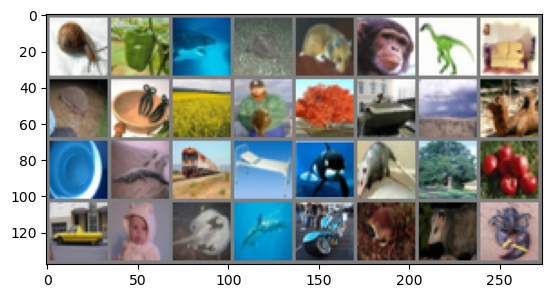

snail sweet_pepper shark porcupine hamster chimpanzee dinosaur couch porcupine bowl  plain flatfish maple_tree tank  plain camel bowl  crocodile train bed   whale possum oak_tree apple pickup_truck baby  ray   dolphin motorcycle shrew possum lobster


In [120]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(cifar_train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{cifar_classes[labels[j]]:5s}' for j in range(batch_size)))

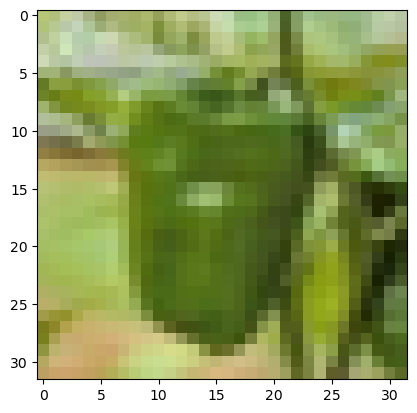

In [121]:
imshow(images[1])

In [122]:
len(cifar_train_loader)


1563

In [123]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

1000


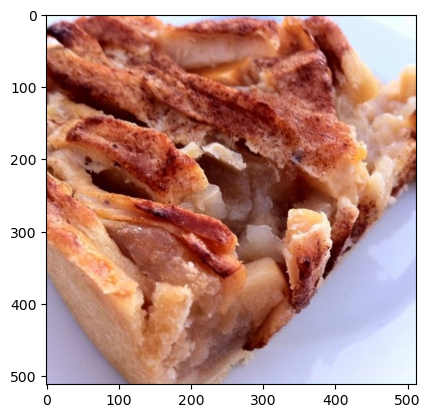

In [124]:
food_type = load_images_from_folder("data/food_data/images/apple_pie")


img = food_type[20]
print(len(food_type))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

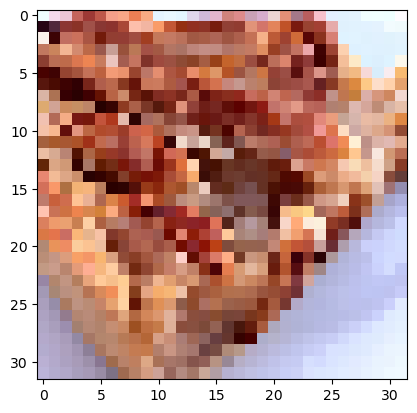

In [126]:
import matplotlib.image


img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

plt.imshow(img)
plt.show()



In [135]:
food_img_directory = os.walk("data/food_data/images/")

downscaled_food_img_directory = list(os.walk("data/food_data/downscaled images/"))[0] # CURTAIL LIST

food_img_directory.__next__()

for dir in food_img_directory:

    if os.path.basename(dir[0]) not in downscaled_food_img_directory[1]:
        os.mkdir(f"data/food_data/downscaled images/{os.path.basename(dir[0])}")
        images = load_images_from_folder(dir[0])
        for i, img in enumerate(images):
            img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
            matplotlib.image.imsave(f"data/food_data/downscaled images/{os.path.basename(dir[0])}/{dir[2][i]}.jpg", img)

        print(dir[0])